# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Important:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

This notebook explores Dandiset 001375, which contains data from a pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.

The Dandiset can be found at [https://dandiarchive.org/dandiset/001375](https://dandiarchive.org/dandiset/001375)

## What this notebook will cover:

*   Loading the Dandiset metadata
*   Listing the assets in the Dandiset
*   Loading and visualizing electrode locations
*   Loading and visualizing raw data from an NWB file
*   Loading and visualizing trial start and stop times

## Required packages:

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

# %%
Load the Dandiset using the DANDI API
from dandi.dandiapi import DandiAPIClient

Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

## Loading data from an NWB file

Here, we load data from the NWB file `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.
We will also show how to get the URL for the asset.

In [1]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Electrode Locations

Here, we plot the electrode locations.

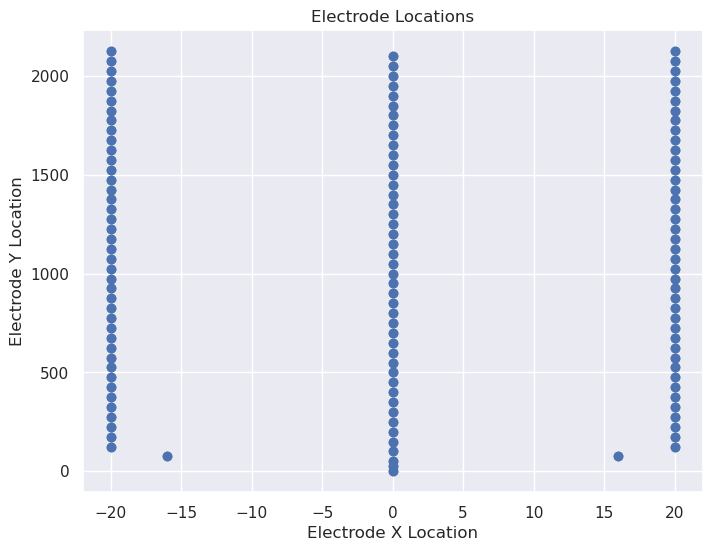

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Get electrode locations
electrode_x = nwb.electrodes.x[:]
electrode_y = nwb.electrodes.y[:]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(electrode_x, electrode_y)
plt.xlabel("Electrode X Location")
plt.ylabel("Electrode Y Location")
plt.title("Electrode Locations")
plt.show()

The electrode locations are arranged in three vertical lines.

### Raw Data

Here, we plot the raw data from channel 0.

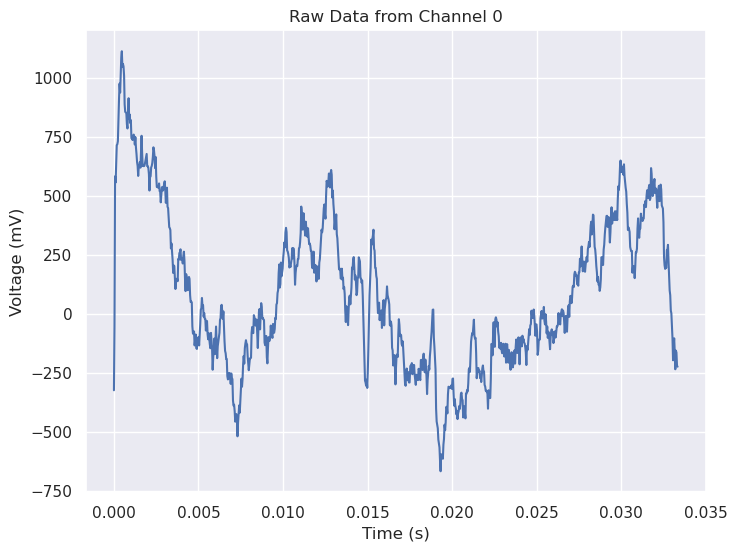

In [3]:
import numpy as np

# Get raw data
raw_data = nwb.acquisition["time_series"].data[:1000, 0]
timestamps = np.linspace(0, len(raw_data)/nwb.acquisition["time_series"].rate, len(raw_data))

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(timestamps, raw_data)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Raw Data from Channel 0")
plt.show()

The plot shows fluctuating voltage data over time, characteristic of a noisy signal.

### Trial Start and Stop Times

Here, we plot the trial start and stop times.

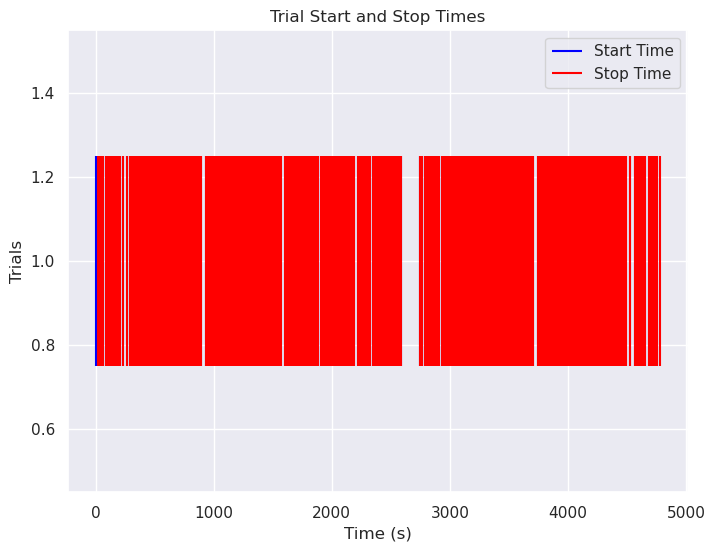

In [4]:

# Get trial start and stop times
trial_start_times = nwb.trials.start_time[:]
trial_stop_times = nwb.trials.stop_time[:]

# Create the plot
plt.figure(figsize=(8, 6))
plt.eventplot(trial_start_times, linelengths=0.5, colors='blue', label='Start Time')
plt.eventplot(trial_stop_times, linelengths=0.5, colors='red', label='Stop Time')
plt.xlabel("Time (s)")
plt.ylabel("Trials")
plt.title("Trial Start and Stop Times")
plt.legend()
plt.show()

The trial start and stop times are clustered, indicating short trial durations.

## Summary

This notebook demonstrated how to load and visualize data from Dandiset 001375. We showed how to load the Dandiset metadata, list the assets, load data from an NWB file, and plot electrode locations, raw data, and trial start/stop times.

## Future directions

*   Explore other datasets in the Dandiset
*   Perform more advanced analysis of the raw data, such as filtering and spike detection
*   Investigate the relationship between electrode locations and neural activity